In [4]:
import pandas as pd

df = pd.read_csv("SN_m_tot_V2.0.csv", sep=';', header=None)
df.columns = [
    "Year", "Month", "DecimalDate", 
    "SunspotNumber", "StandardDeviation", 
    "Observations", "Definitive"
]

# Remove missing or invalid (-1) sunspot values
df = df[df['SunspotNumber'] != -1]

# Create a datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.set_index('Date', inplace=True)


<Axes: title={'center': 'Monthly Sunspot Number'}, xlabel='Date'>

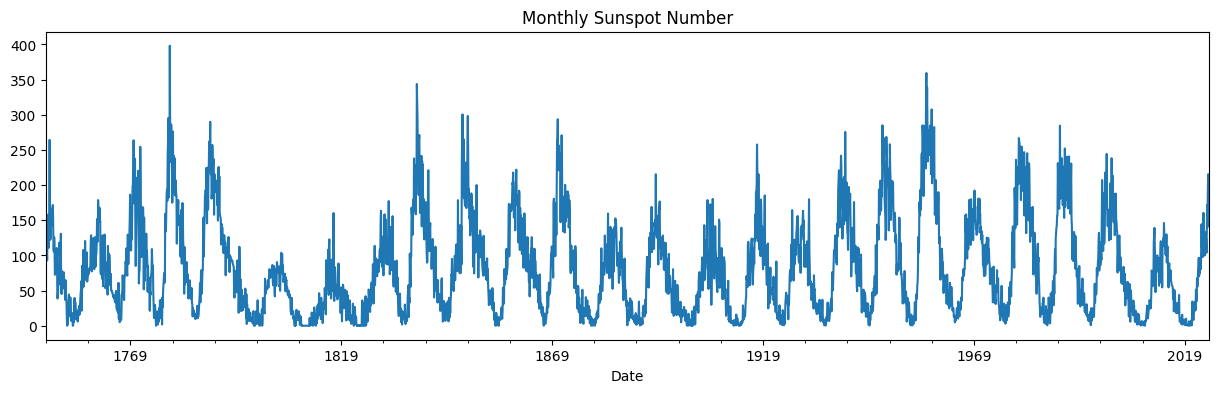

In [5]:
import matplotlib.pyplot as plt
df['SunspotNumber'].plot(figsize=(15, 4), title='Monthly Sunspot Number')


In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
sunspot_scaled = scaler.fit_transform(df[['SunspotNumber']])

def create_sequences(data, window_size=12):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(sunspot_scaled, 12)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, input_shape=(12, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=30, batch_size=32)


c:\Users\PRAGATEI SHARMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0129
Epoch 2/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051
Epoch 3/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046
Epoch 4/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0047
Epoch 5/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048
Epoch 6/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0041
Epoch 7/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0041
Epoch 8/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042
Epoch 9/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0043
Epoch 10/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043
Epoch 11/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039
Epoch 12/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0043
Epoch 13/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038
Epoch 14/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042
Epoch 15/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - l

In [8]:
last_12 = sunspot_scaled[-12:]
input_seq = last_12.reshape(1, 12, 1)
next_month_scaled = model.predict(input_seq)
next_month_unscaled = scaler.inverse_transform(next_month_scaled)
print("Predicted Sunspot Number:", round(next_month_unscaled[0][0], 2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
Predicted Sunspot Number: 148.0
